<a href="https://colab.research.google.com/github/dvarelaj/nlp-miniproyecto-icesi/blob/main/procesamiento_texto_npl_clasico).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from spacy.matcher import Matcher
from collections import Counter

In [95]:
nlp = spacy.load('es_core_news_sm')

In [96]:
df = pd.read_excel('Quejas Enero 2026 Web ARL.xlsx')
texto_raw = str(df['Descripción'].iloc[1])
df.head()

,Compañia,Regional,Fecha de apertura,Fecha de cierre,Número del caso,Tipo,Estado,Medio de recepción,Proceso,Causa,Causa raíz,Lugar ocurrencia,Descripción,TIPIFICACION INTERNA
0,ARL,REGIONAL CENTRO,2026-01-27,NaT,26012736958852,PETICION,Abierto,CORREO ELECTRONICO,TRANSFORMACION DIGITAL,ASESORIA USO DE SITIO TRANSACCIONAL Y SERVICIO...,NaN,BOGOTA D.C.,DE: SECRETARIADEGOBIERNO SECRETARIADEGOBIERNO ...,Solicitud capacitacion operaciones
1,ARL,REGIONAL ANTIOQUIA,2026-01-27,NaT,26012736955703,QUEJA,Abierto,LLAMADA DE ENTRADA,TRANSFORMACION DIGITAL,INCONVENIENTES GENERALES - SUCURSAL VIRTUAL,NaN,MEDELLIN,ME LLEGO NOTIFICACIÓN DE LA EMPRESA QUE QUEDO ...,Claves
2,ARL,REGIONAL ANTIOQUIA,2026-01-27,NaT,26012736952219,QUEJA,Abierto,CHAT GESTION ADMINISTRATIVA,TRANSFORMACION DIGITAL,INCONVENIENTES TECNICOS SITIOS WEB,NaN,MEDELLIN,ESTOY INGRESANDO CON MI USUARIO Y NO ME DEJA I...,Claves
3,ARL,REGIONAL ANTIOQUIA,2026-01-27,NaT,26012736954698,QUEJA,Abierto,WHATSAPP,TRANSFORMACION DIGITAL,INCONVENIENTES GENERALES - SUCURSAL VIRTUAL,NaN,RIONEGRO,ID CHAT 693275664 CANAL DE ATENCIÓN: WHATSAPP ...,Problema de perfil
4,ARL,REGIONAL ANTIOQUIA,2026-01-27,NaT,26012736959196,QUEJA,Abierto,ARLSURA.COM-CONTACTENOS,TRANSFORMACION DIGITAL,INCONVENIENTES TECNICOS SITIOS WEB,NaN,MEDELLIN,ESTOR TRATANDO DE DESCARGAR MI CERTIFICADO DE ...,Certificado afiliación


In [97]:
# Creamos una columna con la longitud de cada queja (en número de palabras)
df['longitud'] = df['Descripción'].apply(lambda x: len(str(x).split()))

# Buscamos la fila con el máximo de palabras
indice_max = df['longitud'].idxmax()
queja_mas_larga = df['Descripción'].iloc[indice_max]

print(f"La queja más larga es la número {indice_max} con {df['longitud'].max()} palabras.")
print("-" * 50)
print(queja_mas_larga[:500] + "...")

La queja más larga es la número 164 con 335 palabras.
--------------------------------------------------
ASUNTO: RECLAMO POR FALLA TÉCNICA RECURRENTE EN GENERACIÓN DE CERTIFICADOS CON NIVEL DE RIESGO - PLATAFORMA WEB SEÑORES ARL SURA: ÁREA DE SERVICIO AL CLIENTE / SOPORTE TÉCNICO CORDIAL SALUDO, POR MEDIO DE LA PRESENTE, YO, BERNABÉ GARCÍA CARVAJAL, IDENTIFICADO CON LA CÉDULA DE CIUDADANÍA NÚMERO 1.1292.892, ACTUANDO EN CALIDAD DE EMPLEADOR, INTERPONGO UN RECLAMO FORMAL DEBIDO A FALLAS TÉCNICAS PERSISTENTES EN SU PLATAFORMA WEB "GESTIÓN ADMINISTRATIVA" / "GESTIÓN DE RIESGOS LABORALES". HECHOS: TENG...


In [98]:
doc_largo

asunto: reclamo por falla técnica recurrente en generación de certificados con nivel de riesgo - plataforma web señores arl sura: área de servicio al cliente / soporte técnico cordial saludo, por medio de la presente, yo, bernabé garcía carvajal, identificado con la cédula de ciudadanía número 1.1292.892, actuando en calidad de empleador, interpongo un reclamo formal debido a fallas técnicas persistentes en su plataforma web "gestión administrativa" / "gestión de riesgos laborales". hechos: tengo afiliado bajo mi cargo al señor wilson javier garzón díaz, identificado con cédula de ciudadanía 82.389.988. al intentar descargar el certificado de afiliación completo (donde se detalle el nivel de riesgo al cual está afiliado mi trabajador) ingresando con mi usuario y contraseña a la sucursal virtual, el sistema arroja sistemáticamente el siguiente error: "no se recuperó información con los parámetros ingresados". este error se presenta a pesar de que la afiliación se encuentra activa. como 

In [99]:
doc_largo = nlp(queja_mas_larga.lower())

# Ejemplo: Ver cuántas oraciones tiene esta queja específica
oraciones_largo = list(doc_largo.sents)
print(f"Esta queja tiene {len(oraciones_largo)} oraciones.")

# Ver las entidades (Empresas, Lugares, Fechas) que SpaCy detecta
print("\nEntidades encontradas en la queja larga:")
for ent in doc_largo.ents:
    print(f"{ent.text:{30}} {ent.label_}")

Esta queja tiene 13 oraciones.

Entidades encontradas en la queja larga:
asunto                         MISC
bernabé garcía carvajal        PER
señor wilson                   PER
javier garzón díaz             PER
sistema falle                  LOC
bernabé garcía carvajal        PER
bernabé garcía                 PER


El modelo preentrenado es_core_news_sm presenta dificultades con el Reconocimiento de Entidades Nombradas (NER) en textos técnicos. Por ejemplo, clasificó 'sistema falle' como una localización (LOC). Esto demuestra que para temas tecnologícos, sería ideal un reentrenamiento del modelo con datos específicos del dominio.

In [100]:
print(f"Tokens en la queja: {len(doc)}")
sentences = list(doc_largo.sents)
print(f"Oraciones encontradas: {len(sentences)}")

Tokens en la queja: 387
Oraciones encontradas: 13


A diferencia del texto literario de Owl Creek, las quejas suelen tener oraciones más cortas y una puntuación menos formal, lo que puede dificultar la segmentación de oraciones en algunos casos.

In [101]:
print("{:20}{:20}{:20}{:20}".format("Token", "POS", "Dep", "Lemma"))
for token in sentences[0]: # Analizamos la primera oración de la queja
    print(f"{token.text:{20}}{token.pos_:{20}}{token.dep_:{20}}{token.lemma_:{20}}")

Token               POS                 Dep                 Lemma               
asunto              NOUN                nsubj               asunto              
:                   PUNCT               punct               :                   
reclamo             VERB                advcl               reclamar            
por                 ADP                 case                por                 
falla               NOUN                obj                 falla               
técnica             ADJ                 amod                técnico             
recurrente          ADJ                 amod                recurrente          
en                  ADP                 case                en                  
generación          NOUN                obl                 generación          
de                  ADP                 case                de                  
certificados        NOUN                nmod                certificado         
con                 ADP     

In [102]:
# Patrón para detectar cuando mencionan errores o fallas
pattern_error = [
    {'LEMMA': {'IN': ['error', 'falla', 'fallar', 'problema']}},
    {'POS': 'ADJ', 'OP': '*'}, # Adjetivos opcionales como "técnica" o "recurrente"
]

# Initialize the matcher with the nlp object's vocabulary (if not already initialized)
m_matcher = Matcher(nlp.vocab)
m_matcher.add("ReporteError", [pattern_error])

matches = m_matcher(doc_largo)
# ... (el mismo bucle for que ya tienes para imprimir)

# 3. Ejecutar
matches = m_matcher(doc_largo)

for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]
    span = doc_largo[start:end] # Use doc_largo here since matches were generated from it
    print(f"Match encontrado: {string_id} -> {span.text}")

Match encontrado: ReporteError -> falla
Match encontrado: ReporteError -> falla técnica
Match encontrado: ReporteError -> falla técnica recurrente
Match encontrado: ReporteError -> fallas
Match encontrado: ReporteError -> fallas técnicas
Match encontrado: ReporteError -> fallas técnicas persistentes
Match encontrado: ReporteError -> error
Match encontrado: ReporteError -> error
Match encontrado: ReporteError -> error
Match encontrado: ReporteError -> error técnico
Match encontrado: ReporteError -> error
Match encontrado: ReporteError -> error


Al analizar una queja formal, se observa que el usuario evita el lenguaje coloquial (como 'no me deja'). En su lugar, utiliza sustantivos técnicos como 'falla técnica' o 'error'. El Matcher debe ser adaptado para buscar estos términos nominales en lugar de solo estructuras verbales negativas.

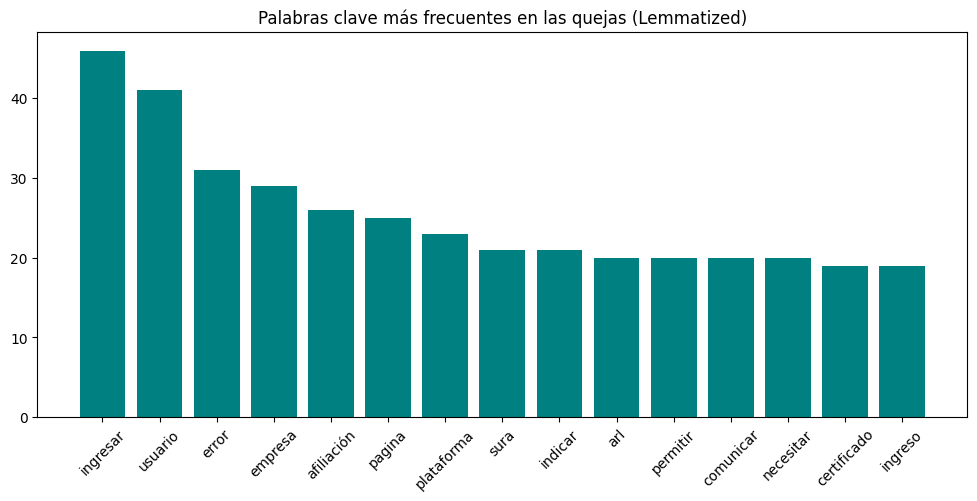

In [103]:
# Extraer todos los lemas de todas las quejas
todos_los_lemas = []
for descripcion in df['Descripción'].dropna().head(100): # Analizamos las primeras 100
    d = nlp(str(descripcion).lower())
    for token in d:
        if token.is_alpha and not token.is_stop: # Solo palabras reales y no conectores (stop words)
            todos_los_lemas.append(token.lemma_)

# Graficar las 15 más comunes
frecuencia = Counter(todos_los_lemas)
palabras, conteos = zip(*frecuencia.most_common(15))

plt.figure(figsize=(12,5))
plt.bar(palabras, conteos, color='teal')
plt.title("Palabras clave más frecuentes en las quejas (Lemmatized)")
plt.xticks(rotation=45)
plt.show()